## Hello everybody 😃 😃 welcome back

In [8]:
import os
import cv2 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Image Size
IMG_ROWS, IMG_COLS = 100, 100 # input image dimensions
NB_CLASSES =  3 # number of outputs = number of digits

In [9]:
#########################################################################
# (01)   ACQUISITION DES DONNEES - IMAGES DES FEUILLES DES PLANTES.     #
#########################################################################

In [10]:
########################################### function for plotting images

def plot_images(images, total_images=100, rows=20, cols=5, fsize=(20,100), titre='Image'):
    
    fig = plt.figure(figsize=fsize) # create a new figure window
    
    for i in range(total_images): # display images
        # subplot : 33 rows and 5 columns
        img_grid = fig.add_subplot(rows, cols, i+1)
        # plot features as image
        img_grid.imshow(images[i])
        
        plt.title(titre)
 
############################################ function for resizng images
       
def preprocess_image(image, image_height=IMG_ROWS, image_width=IMG_COLS):

    return cv2.resize(image, (image_height, image_width))
        
def read_images (path , sz= None ):
    
    print('\nCHARGEMENT DES IMAGES DE LA BASE .......................!\n') 

    X,y = [], []
    
    for dirname , dirnames , filenames in os.walk(path):
        
        c = 0
        
        for subdirname in dirnames :
            
            subject_path = os. path . join ( dirname , subdirname )
            
            for filename in os. listdir ( subject_path ):
                
                im = Image.open(os.path.join(subject_path, filename))
                #im = im.convert ("L")

                if (sz is not None ):
                    im = im.resize (sz , Image.ANTIALIAS ) 
                    
                im = np.array(im)
                im = preprocess_image(im, IMG_ROWS, IMG_COLS)
                X.append(im)
                y.append (c)  
                
            c = c+1
            
    return [X,y]



LECTURE DES IMAGES DE LA BASE DE TEST...................!

CHARGEMENT DES IMAGES DE LA BASE .......................!


CHARGEMENT DES IMAGES DE LA BASE .......................!


AFFICHAGE DE QUELQUES IMAGES DE LA BASE.................!


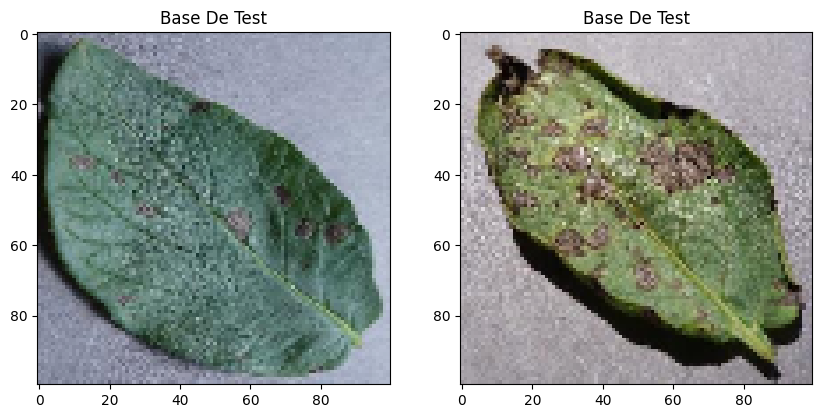


FIN D'AFFICHAGE DES IMAGES DE LA BASE...................!



In [11]:
############################################ Read And Resize test images

print('\n\nLECTURE DES IMAGES DE LA BASE DE TEST...................!') 

[X_test, y_test] = read_images("./Data/Potato/TestData") # Potato

[X_train, y_train] = read_images("./Data/Potato/TrainData") # Potato

print('\nAFFICHAGE DE QUELQUES IMAGES DE LA BASE.................!')
plot_images(X_test, 2, 1, 2,(10, 50), titre='Base De Test')
plt.show()
print('\nFIN D\'AFFICHAGE DES IMAGES DE LA BASE...................!\n')

In [12]:
############################################################## Test Data

images_test = X_test
images_test = np.array(images_test)

images_train = X_train
images_train = np.asarray(images_train)

# Test targets
test_features  = images_test
test_targets = y_test # targets

# Train targets
train_features = images_train
train_targets = y_train 

from keras.utils import to_categorical
test_targets = to_categorical(test_targets, NB_CLASSES)


test_features = test_features.astype('float32')
train_features = train_features.astype('float32')

In [13]:
print('\nNORMALISATION DES BASES DE TEST ET D\'APPRENTISSAGE.\n')
########################################################## Normalisation

mean_vals = np.mean(train_features, axis=0)
std_val = np.std(train_features)
test_features = (test_features - mean_vals)/std_val

test_features = test_features.reshape(test_features.shape[0], IMG_ROWS, IMG_COLS, 3)

print("test_features.shape      >==============<> : {}".format(test_features.shape))
print("test_targets.shape       >==============<> : {}".format(test_targets.shape))


NORMALISATION DES BASES DE TEST ET D'APPRENTISSAGE.

test_features.shape      >==============<> : (430, 100, 100, 3)
test_targets.shape       >==============<> : (430, 3)


In [14]:
########################################################################
#(02)           EVALUATION DES PERFORMANCES DU MODELE CREE             #
########################################################################

VERBOSE = 1

from keras.models import load_model

model_new = load_model("lenet_groupe_2.h5")

score = model_new.evaluate(test_features, test_targets, verbose=VERBOSE)

print('\nThe experimental results of Model \n')
print("Test loss of model: %.2f%%" % (score[0])) 
print("Test accuracy of Model : %.2f%%" % (score[1]*100))
print("Model error rate : %.2f%%" % (100-score[1]*100))

14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 358ms/step - accuracy: 0.8703 - loss: 0.3290

The experimental results of Model 

Test loss of model: 0.43%
Test accuracy of Model : 82.33%
Model error rate : 17.67%
